## Урок 2. Домашнее задание 

### 2.1 Домашнее задание начального уровня

Вычислите евклидово расстояние между кластером *c1* и кластером *c3*. Это расстояние получилось меньше, или больше чем расстояние между кластером *c1* и кластером *c2*?

Координаты центра для трёх кластеров:

* "красный" кластер $c_1 = [1.0, 1.5]$
* "оранжевый" кластер $c_2 = [-1.0, -0.5]$
* "зеленый" кластер $c_3 = [1.0, -0.5]$

![clustering_example](https://248006.selcdn.ru/public/DS.%20Block%202.%20M7/clustering_example.png)

In [6]:
# -- ВАШ КОД ТУТ --
from scipy.spatial.distance import euclidean

dist1 = euclidean([1.,1.5], [1., -.5])
dist2 = euclidean([1.,1.5], [-1., -.5])
dist1, dist2
#dist1 < dist2

(2.0, 2.8284271247461903)

## Урок 4. Домашнее задание 

### 4.1 Домашнее задание начального уровня

Потренируйтесь в программировании на python. Надо будет найти расстояние от каждой точки из массива $X$ до центра кластера, а потом просуммировать эти расстояния. Это будет реализацией библиотечной функции `sklearn.metrics.pairwise.euclidean_distances` из первого урока.  В итоге у Вас должно получиться число чуть более $16$ - это и будет расстояние.
$$
\sum_{i=1}^{k} \mid x_i - c \mid
$$

где для одного обучающего примера x, состоящего из двух координат:
$$
\mid x - c \mid = (x_1-c_1)^2 + (x_2-c_2)^2
$$

**Примечание** Как вы уже знаете из урока про линейную регрессию, в этой формуле должен быть квадратный корень, но для скорости работы мы опускаем его.

**Подсказка** Средствами библиотеки numpy реализуйте формулу нахождения суммы внутрикластерных расстояний

In [1]:
import numpy as np

clust = np.array([
 [-0.5972191612445694, -0.5919098916910581],
 [-1.5838020751869848, 0.4743393635868491],
 [-1.892642118066139, -1.2770390481464395],
 [-1.021761443519372, -0.38446059106320013],
 [-0.628271339507516, -2.308149346281125],
 [-0.7180915776856387, 1.1805550909358404],
 [-1.543143767548152, -1.4163791359687334],
 [0.022103701018375554, -1.1279478858865397],
 [-0.7776518874305778, -0.4157532453316538],
 [-1.2073577296008344, -1.1308523658604184]
])

centroid = np.array([-0.9774245525274352, -0.032635425821084516])

# -- ВАШ КОД ТУТ --

# -- ВАШ КОД ТУТ --
def centroid_distance(clust, centroid):
    d = 0
    for point in clust:
        d += (point[0]-centroid[0])**2 + (point[1]-centroid[1])**2
    return d

centroid_distance(clust, centroid)

16.31211696438564

### 4.2 Домашнее задание начального уровня  

Обучите алгоритм k-средних для количества кластеров $n=3$ на том же датасете, который содержится в файле `data/clustering.pkl`. Визуализируйте результат:

In [3]:
import pickle
with open("./data/clustering.pkl","rb") as f:
    data = pickle.load(f)
X = data["X"]
Y = data["Y"]


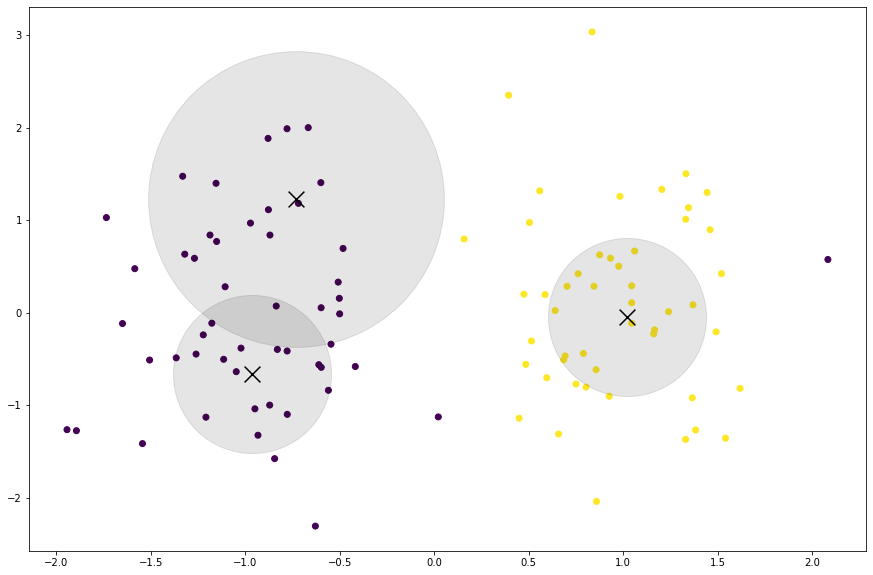

In [4]:
# -- ВАШ КОД ТУТ --
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
km.fit(X)
[c1, c2, c3] = km.cluster_centers_

c1, c2, c3

# Commented out IPython magic to ensure Python compatibility.
import matplotlib.pyplot as plt
# %matplotlib inline

fig, ax = plt.subplots(figsize=(15, 10))

ax.scatter(X[:,0:1], X[:,1:], c=Y)
ax.scatter(c1[0], c1[1], s=250, marker="x", c="black")
ax.scatter(c1[0], c1[1], s=250 * 1e2, c="black", alpha=0.1)

ax.scatter(c2[0], c2[1], s=250, marker="x", c="black")
ax.scatter(c2[0], c2[1], s=250 * 1e2, c="black", alpha=0.1)

ax.scatter(c3[0], c3[1], s=250, marker="x", c="black")
ax.scatter(c3[0], c3[1], s=250 * 3.5e2, c="black", alpha=0.1)
plt.show()


### 4.3 Домашнее задание высокого уровня

Мы узнали про эвристику, улучшающую алгоритм: запустить несколько раз алгоритм, запомнить, куда попали центроиды при каждом запуске, а потом усреднить координаты за все несколько запуска.

Попробуйте применить эту эвристику на практике: 

* используйте 10 запусков алгоритма $k$-средних для $k=2$ с параметрами
<pre>
kmeans_model = KMeans(n_clusters=2, n_init=1, random_state=None, algorithm='full', max_iter=2)
</pre>
* в каждом запуске сохраняйте координаты центроидов общий массив $c$. См. `cluster_centers_ : array, [n_clusters, n_features]`
* визуализируйте координаты точек из $c$ на фоне исходного множества точек

Результат будет примерно такой:
![several_init_knn](https://248006.selcdn.ru/public/DS.%20Block%202.%20M7/several_init_knn.png)

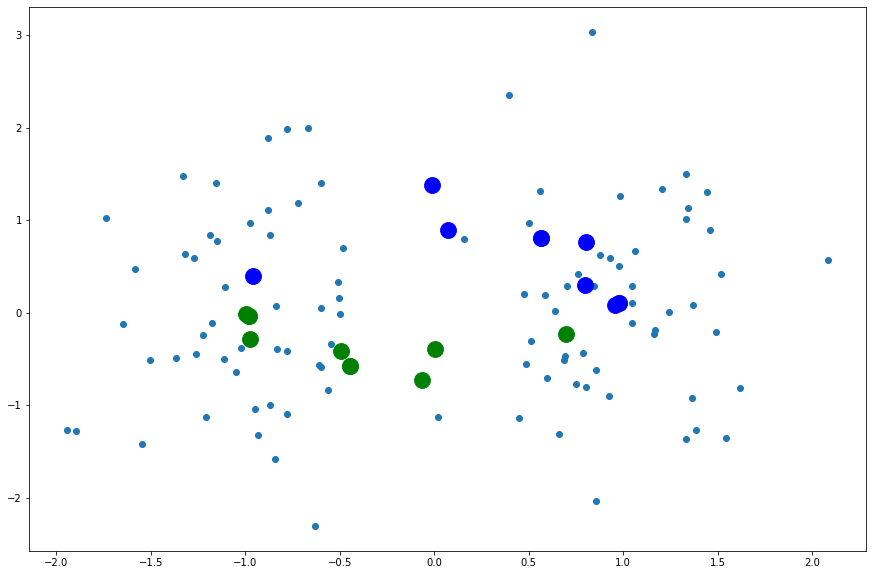

In [5]:
# -- ВАШ КОД ТУТ --
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(X[:,0:1], X[:,1:])

centroids = []
for i in range(10):
    km = KMeans(n_clusters=2, n_init=1, random_state=None, algorithm='full', max_iter=2)
    km.fit(X)
    [c1, c2] = km.cluster_centers_
    centroids.append([c1, c2])
    ax.scatter(c1[0], c1[1], s=250, c="blue")
    ax.scatter(c2[0], c2[1], s=250, c="green")  

plt.show()

Мы выяснили, что один из недостатков алгоритма k-средних состоит в том, что количество кластеров надо задать до тренировки модели, но как же определить, сколько будет кластеров в данных? Для этой задачи существует эффективный алгоритм, о котором мы поговорим в следующем уроке.

## Урок 8. Домашнее задание начального уровня


Обучите модель DBSCAN с параметром *min_samples=8*. Визуализируйте результат.

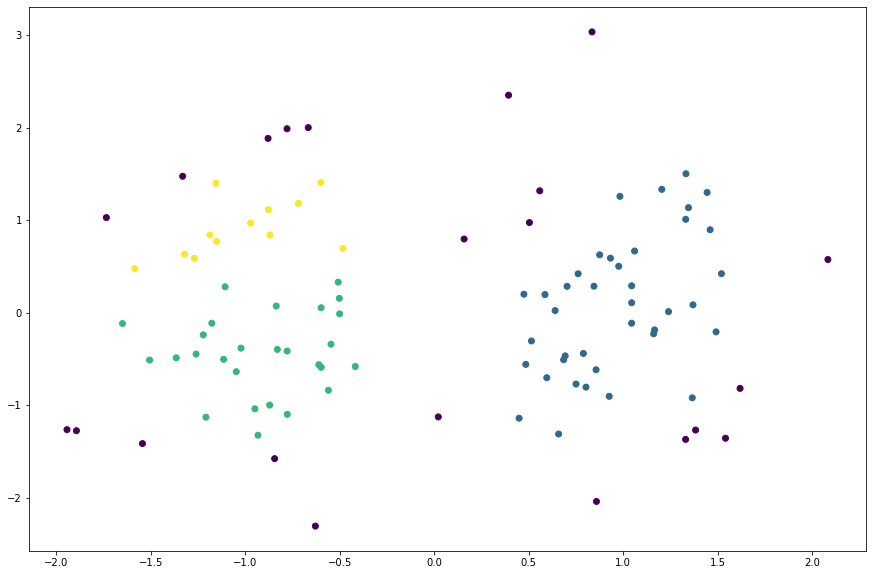

In [12]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(min_samples=8)

dbscan.fit(X)
labels = dbscan.labels_

fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(X[:,0:1], X[:,1:], c=labels)

## Урок 10. Домашнее задание 

### 10.1 Домашнее задание начального уровня

Обучите *k-means* для количества кластеров $k=4$ на датасете `data/clustering.pkl`. Как изменилась метрика силуэтта? Стало лучше или хуже? Какое количество кластеров лучше, два или четыре?

In [22]:
km2 = KMeans(n_clusters=2).fit(X)
km4 = KMeans(n_clusters=4).fit(X)

from sklearn.metrics import silhouette_score

silhouette_score(X, km2.labels_), silhouette_score(X, km4.labels_)
#Ухудшилась, лучше 2, чем 4

(0.4465356047465253, 0.4388619866610211)


### 10.2 Домашнее задание начального уровня

Обучите *k-means* для количества кластеров $k=4$ на датасете `data/clustering.pkl`. Как изменилась метрика *AMI*? Стало лучше или хуже? Какое количество кластеров лучше по метрике AMI?

In [24]:
from sklearn.metrics import adjusted_mutual_info_score
km2 = KMeans(n_clusters=2).fit(X)
km4 = KMeans(n_clusters=4).fit(X)
adjusted_mutual_info_score(Y, km2.labels_), adjusted_mutual_info_score(Y, km4.labels_)
#2 кластера лучше

(0.9286022516535728, 0.5835423055834896)

### 10.3 Домашнее задание высокого уровня

Загрузите датасет `clustering_hw.csv` из приложенной директории `data` и визуализируйте данные. Должно получится как-то так:

![clustering_hw](https://248006.selcdn.ru/public/DS.%20Block%202.%20M7/clustering_hw.png)

В рамках домашней работы

1. вычислите оптимальное количество кластеров $k$
1. обучите k-means с количеством кластеров  $k$
1. к какому кластеру принадлежит точка $x=(5, 8)$? к какому кластеру принадлежит точка $x=(0, 5)$? Они принадлежат к разным кластерам или одному?
1. Каково качество кластеризации по AMI

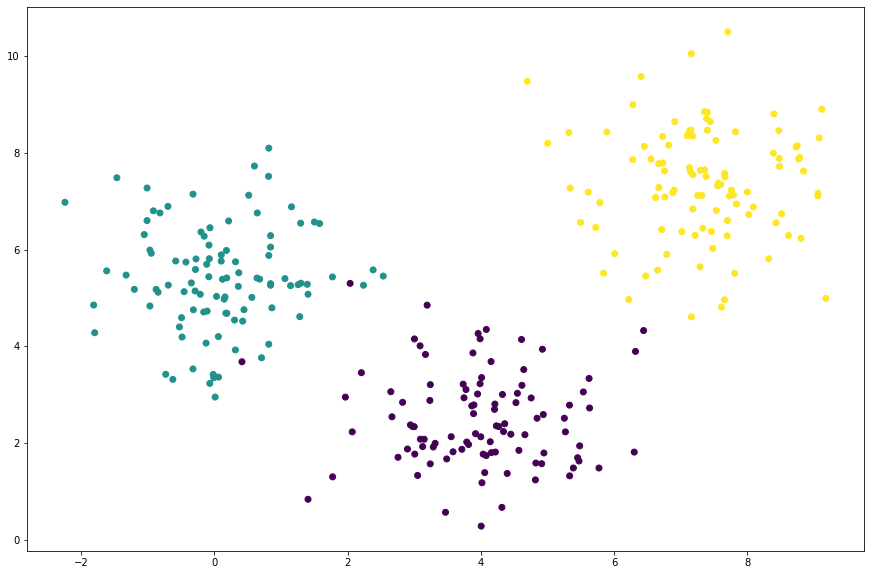

In [19]:
import pandas as pd
df = pd.read_csv("./data/clustering_hw.csv")

fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(df["x1"], df["x2"], c=df["y"])

cluster_num 1, metric 1105.897378110108
cluster_num 2, metric 663.5712032768098
cluster_num 3, metric 374.6589714184063
cluster_num 4, metric 348.17052724059613
cluster_num 5, metric 323.0909288942993
cluster_num 6, metric 300.10388486033395
best cluster num: 3


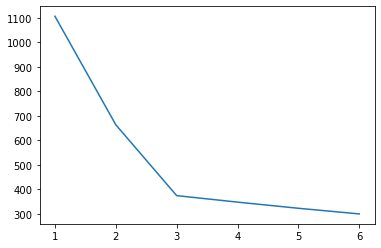

In [28]:
X = df[["x1","x2"]].values
Y = df[["y"]].values

from sklearn.metrics.pairwise import euclidean_distances

MAX_CLUSTERS = 7
metrics = []

for cluster_num in range(1, MAX_CLUSTERS):
    kmeans_model = KMeans(n_clusters=cluster_num, random_state=99).fit(X)
    centroids, labels = kmeans_model.cluster_centers_, kmeans_model.labels_
    metric = 0
    for centroid_label in range(cluster_num):
        metric += euclidean_distances(
            X[labels==centroid_label],
            centroids[centroid_label,:].reshape(1,-1)
        ).sum(axis=0)[0]
    print("cluster_num %s, metric %s" % (cluster_num, metric))
    metrics.append(metric)

D = []
for i in range(0, len(metrics)-1):
    d = abs(metrics[i+1]-metrics[i])/abs(metrics[i]-metrics[i-1])
    D.append(d)
print("best cluster num: %s" % (np.argmin(D)+1))

plt.plot([i+1 for i in range(len(metrics))], metrics)
plt.show()

#Как и видно невооруженным взглядом - лучшее число 3

In [29]:
km3 = KMeans(n_clusters=3).fit(X)
km3.predict([[5.,8.], [0.,5.]])
#Они принадлежат к разным кластерам (желтому и фиолетовому видимо)

array([0, 1])

In [32]:
adjusted_mutual_info_score(Y.squeeze(), km3.labels_)
#Выдающийся результат, не так ли

0.9700074953683859